En este documento se presentará la primera versión de la fase de entendimiento de los datos.
El objetivo de este cuaderno es mostrar un análisis preliminar exploratorio de los datos.

Este ejercicio se realizará con lenguaje de programación R. En primer lugar, se muestran las librerías usadas

In [ ]:
library(tibble)
library(readr)
library(dplyr)
library(knitr)
library(tidyr)
install.packages("kableExtra")
library(kableExtra)
library(ggplot2)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



A continuación se muestra la forma de importación de los datos para la base comauto_pos:

In [ ]:
AutoComercial<-read_csv("comauto_pos.csv",col_names = TRUE)

Rows: 15800 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): GRNAME
dbl (12): GRCODE, AccidentYear, DevelopmentYear, DevelopmentLag, IncurLoss_C...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Un análisis preliminar de los datos muestra lo siguiente:

In [ ]:
str(AutoComercial)

spc_tbl_ [15,800 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE           : num [1:15800] 266 266 266 266 266 266 266 266 266 266 ...
 $ GRNAME           : chr [1:15800] "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" "Public Underwriters Grp" ...
 $ AccidentYear     : num [1:15800] 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear  : num [1:15800] 1988 1989 1990 1991 1992 ...
 $ DevelopmentLag   : num [1:15800] 1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_C      : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ CumPaidLoss_C    : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ BulkLoss_C       : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremDIR_C  : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremCeded_C: num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ EarnedPremNet_C  : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Single           : num [1:15800] 0 0 0 0 0 0 0 0 0 0 ...
 $ PostedReserve97_C: num [1:15800] 932 932 932 932 932 932 932 932 932 932 ...
 - attr(*, "spec")=
  

Los formatos lucen de la siguiente manera:

In [ ]:
formatos <- AutoComercial %>%
  summarize_all(list(format = ~ toString(class(.))))
View(formatos)

GRCODE_format,GRNAME_format,AccidentYear_format,DevelopmentYear_format,DevelopmentLag_format,IncurLoss_C_format,CumPaidLoss_C_format,BulkLoss_C_format,EarnedPremDIR_C_format,EarnedPremCeded_C_format,EarnedPremNet_C_format,Single_format,PostedReserve97_C_format
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
numeric,character,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


La única variable categórica es GRCODE que se compone de la siguiente manera:

In [ ]:
elementos <- unique(AutoComercial$GRNAME)
elementos_distintos_df <- data.frame(Compañía = elementos)
View(elementos_distintos_df)

Compañía
<chr>
Public Underwriters Grp
California Cas Grp
Celina Mut Grp
Federal Ins Co Grp
Buckeye Ins Grp
Employers Mut Co Of Des Moines
FM Global
Farm Bureau Of MI Grp
West Bend Mut Ins Grp


Las estadisticas descriptivas se ven así:

In [ ]:
EstDesc<-summary(AutoComercial)
EstDesc

     GRCODE         GRNAME           AccidentYear  DevelopmentYear
 Min.   :  266   Length:15800       Min.   :1988   Min.   :1988   
 1st Qu.: 8281   Class :character   1st Qu.:1990   1st Qu.:1994   
 Median :15303   Mode  :character   Median :1992   Median :1997   
 Mean   :18655                      Mean   :1992   Mean   :1997   
 3rd Qu.:28886                      3rd Qu.:1995   3rd Qu.:2000   
 Max.   :44598                      Max.   :1997   Max.   :2006   
 DevelopmentLag  IncurLoss_C     CumPaidLoss_C         BulkLoss_C      
 Min.   : 1.0   Min.   :  -253   Min.   :  -253.00   Min.   : -1395.0  
 1st Qu.: 3.0   1st Qu.:     5   1st Qu.:     2.75   1st Qu.:     0.0  
 Median : 5.5   Median :   315   Median :   229.00   Median :     0.0  
 Mean   : 5.5   Mean   :  5156   Mean   :  4190.97   Mean   :   357.4  
 3rd Qu.: 8.0   3rd Qu.:  1965   3rd Qu.:  1535.25   3rd Qu.:    26.0  
 Max.   :10.0   Max.   :256434   Max.   :244280.00   Max.   :105923.0  
 EarnedPremDIR_C    EarnedP

A continuación, se presenta un análisis exploratorio de las cifras relacionadas a los siniestros que representan un insumo importante dentro del IBNR con base en el año de desarrollo:

In [ ]:
resumen_por_año <- AutoComercial %>%
  group_by(DevelopmentYear) %>%
  summarise(Incurred_Loss = sum(IncurLoss_C), Cummulate_Loss = sum(CumPaidLoss_C))

resumen_por_año<-as.data.frame(resumen_por_año)
View(resumen_por_año)


DevelopmentYear,Incurred_Loss,Cummulate_Loss
<dbl>,<dbl>,<dbl>
1988,600839,154058
1989,1309342,500772
1990,2081606,987503
1991,2859155,1587324
1992,3674297,2234030
1993,4522315,2982593
1994,5404961,3781285
1995,6311670,4646588
1996,7174345,5562037


Se tienen las gráficas para el análisis exploratorio de la información:

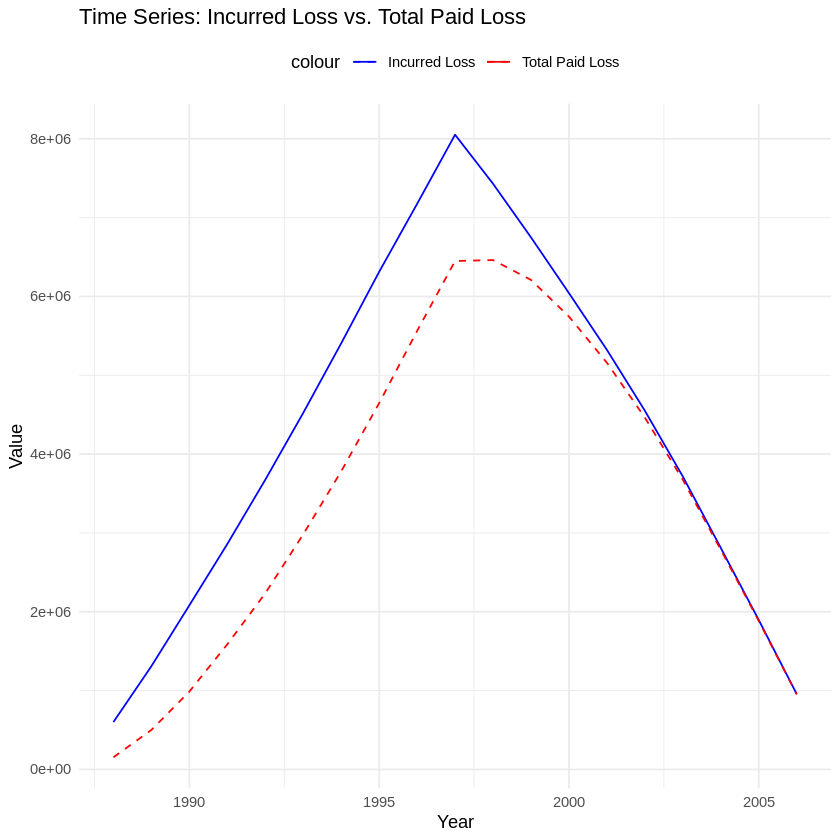

In [ ]:
ggplot(data = resumen_por_año, aes(x = DevelopmentYear)) +
  geom_line(aes(y = Incurred_Loss, color = "Incurred Loss"), linetype = "solid") +
  geom_line(aes(y = Cummulate_Loss, color = "Total Paid Loss"), linetype = "dashed") +
  labs(title = "Time Series: Incurred Loss vs. Total Paid Loss",
       x = "Year",
       y = "Value") +
  scale_color_manual(values = c("Incurred Loss" = "blue", "Total Paid Loss" = "red")) +
  scale_linetype_manual(values = c("Incurred Loss" = "solid", "Total Paid Loss" = "dashed")) +
  theme_minimal() +
  theme(legend.position = "top")

A continuación se muestra la tendencia de desarrollo con base en los siniestros ocurridos

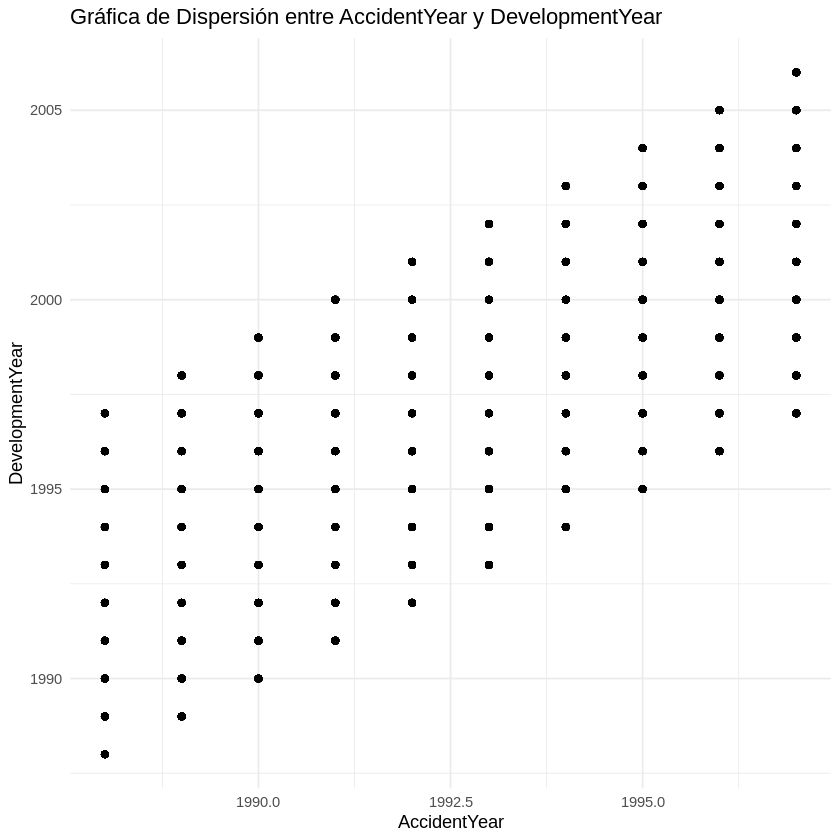

In [ ]:
ggplot(data = AutoComercial, aes(x = AccidentYear, y = DevelopmentYear)) +
  geom_point() +
  labs(title = "Gráfica de Dispersión entre AccidentYear y DevelopmentYear",
       x = "AccidentYear",
       y = "DevelopmentYear") +
  theme_minimal()

Para el reporte de calidad se empieza por un análisis de valores nulos

In [ ]:
Nulos<-is.na(AutoComercial)

cantidad_nulos_por_columna <- colSums(Nulos)

tabla_nulos <- data.frame(Variable = names(cantidad_nulos_por_columna),
                          ValoresNulos = cantidad_nulos_por_columna)
print(tabla_nulos)

                           Variable ValoresNulos
GRCODE                       GRCODE            0
GRNAME                       GRNAME            0
AccidentYear           AccidentYear            0
DevelopmentYear     DevelopmentYear            0
DevelopmentLag       DevelopmentLag            0
IncurLoss_C             IncurLoss_C            0
CumPaidLoss_C         CumPaidLoss_C            0
BulkLoss_C               BulkLoss_C            0
EarnedPremDIR_C     EarnedPremDIR_C            0
EarnedPremCeded_C EarnedPremCeded_C            0
EarnedPremNet_C     EarnedPremNet_C            0
Single                       Single            0
PostedReserve97_C PostedReserve97_C            0
